In [33]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
# provider = IBMQ.get_provider("ibm-q")
provider = IBMQ.get_provider(hub='ibm-q-education', group='yale-uni-2', project='cpsc647-quantum')
# device = provider.get_backend('ibmq_lima') #run on ibmq_lima (5-qbit QC)

ibmqfactory.load_account:WARNING:2022-01-18 12:24:22,124: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem', 'ibmq_casablanca', 'ibmq_jakarta', 'ibm_lagos', 'ibm_perth'  ]
device = [0]*len(device_names)
for i in range(len(device_names)):
    device[i] = provider.get_backend(device_names[i])
    print("Device", i , "=", device[i])


Device 0 = ibmq_lima
Device 1 = ibmq_bogota
Device 2 = ibmq_santiago
Device 3 = ibmq_manila
Device 4 = ibmq_quito
Device 5 = ibmq_belem
Device 6 = ibmq_casablanca
Device 7 = ibmq_jakarta
Device 8 = ibm_lagos
Device 9 = ibm_perth


In [13]:
def bv_algorithm(s, n):
    # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
    bv_circuit = QuantumCircuit(n+1, n)

    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Apply barrier 
    bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
            bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)

    # Apply barrier 
    bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)
    
    # Measurement
    for i in range(n):
        bv_circuit.measure(i, i)
    
    return bv_circuit

In [14]:
bv = bv_algorithm('10', 2)
print(bv)

     ┌───┐      ░ ┌───┐ ░ ┌───┐┌─┐   
q_0: ┤ H ├──────░─┤ I ├─░─┤ H ├┤M├───
     ├───┤      ░ └───┘ ░ ├───┤└╥┘┌─┐
q_1: ┤ H ├──────░───■───░─┤ H ├─╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ H ├┤ Z ├─░─┤ X ├─░───────╫──╫─
     └───┘└───┘ ░ └───┘ ░       ║  ║ 
c: 2/═══════════════════════════╩══╩═
                                0  1 


In [15]:
transpiled_bv = [0]*len(device)
for i in range(len(device)):
    print("============================================")
    print(device[i])
#     transpiled_q[i] = transpile(q, device[i], optimization_level=3, scheduling_method='alap')
    transpiled_bv[i] = transpile(bv, device[i], optimization_level=3, scheduling_method='alap')
    print(transpiled_bv[i])
    print("============================================")

ibmq_lima
                   ┌─────────┐     ┌────┐┌─────────┐  ░ ┌─────────────────┐ ░ »
      q_0 -> 0 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░─┤ Delay(1504[dt]) ├─░─»
                   ├─────────┤     ├────┤├─────────┤  ░ └─────────────────┘ ░ »
      q_1 -> 1 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░──────────■──────────░─»
                   ├─────────┤     ├────┤├─────────┴┐ ░        ┌─┴─┐        ░ »
      q_2 -> 2 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(-π/2) ├─░────────┤ X ├────────░─»
               ┌───┴─────────┴────┐└────┘└──────────┘ ░        └───┘        ░ »
ancilla_0 -> 3 ┤ Delay(25904[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤                                           »
ancilla_1 -> 4 ┤ Delay(25904[dt]) ├───────────────────────────────────────────»
               └──────────────────┘                                           »
          c: 2/═══════════════════════════════════════════════════════════════»
                              

                   ┌─────────┐     ┌────┐┌─────────┐  ░ ┌─────────────────┐ ░ »
      q_0 -> 0 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░─┤ Delay(1824[dt]) ├─░─»
                   ├─────────┤     ├────┤├─────────┤  ░ └─────────────────┘ ░ »
      q_1 -> 1 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(π/2) ├──░──────────■──────────░─»
                   ├─────────┤     ├────┤├─────────┴┐ ░        ┌─┴─┐        ░ »
      q_2 -> 2 ────┤ Rz(π/2) ├─────┤ √X ├┤ Rz(-π/2) ├─░────────┤ X ├────────░─»
               ┌───┴─────────┴────┐└────┘└──────────┘ ░        └───┘        ░ »
ancilla_0 -> 3 ┤ Delay(28656[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤                                           »
ancilla_1 -> 4 ┤ Delay(28656[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤                                           »
ancilla_2 -> 5 ┤ Delay(28656[dt]) ├───────────────────────────────────────────»
               ├──────────────────┤     

ibm_perth


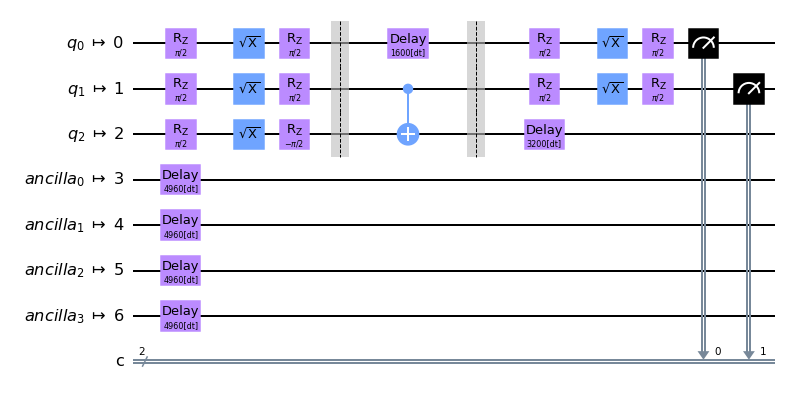

In [27]:
j = 9
print(device[j])
transpiled_bv[j].draw('mpl')

In [30]:
q =  QuantumCircuit(2)
q.cx(0,1)
print(q)

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘


In [32]:
transpiled_q = [0]*len(device)
for i in range(len(device)):
    print("============================================")
    print(device[i])
#     transpiled_q[i] = transpile(q, device[i], optimization_level=3, scheduling_method='alap')
    transpiled_q[i] = transpile(q, device[i], optimization_level=3, scheduling_method='alap')
    print(transpiled_q[i])
    print("============================================")

ibmq_lima
                                  
      q_0 -> 0 ─────────■─────────
                      ┌─┴─┐       
      q_1 -> 1 ───────┤ X ├───────
               ┌──────┴───┴──────┐
ancilla_0 -> 2 ┤ Delay(1376[dt]) ├
               ├─────────────────┤
ancilla_1 -> 3 ┤ Delay(1376[dt]) ├
               ├─────────────────┤
ancilla_2 -> 4 ┤ Delay(1376[dt]) ├
               └─────────────────┘
ibmq_bogota
                                  
      q_0 -> 0 ─────────■─────────
                      ┌─┴─┐       
      q_1 -> 1 ───────┤ X ├───────
               ┌──────┴───┴──────┐
ancilla_0 -> 2 ┤ Delay(3104[dt]) ├
               ├─────────────────┤
ancilla_1 -> 3 ┤ Delay(3104[dt]) ├
               ├─────────────────┤
ancilla_2 -> 4 ┤ Delay(3104[dt]) ├
               └─────────────────┘
ibmq_santiago
                                  
      q_0 -> 0 ─────────■─────────
                      ┌─┴─┐       
      q_1 -> 1 ───────┤ X ├───────
               ┌──────┴───┴──────┐
ancilla_0 -> 2 ┤ De